In [1]:

from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import sys
import torch
import numpy as np
import torchvision.transforms as T
import cv2
from random import randint
import os
import pandas as pd
from tqdm import tqdm
import torchvision

### Getting crops from original images

In [2]:
train = pd.read_csv('train.csv')
train.head()

,image,width,height,left,top,right,bottom,question
0,https://toloka-cdn.azureedge.net/wsdmcup2023/0...,640,427,129,192,155,212,What does it use to breath?
1,https://toloka-cdn.azureedge.net/wsdmcup2023/0...,640,427,424,28,427,32,What can fly in the sky?
2,https://toloka-cdn.azureedge.net/wsdmcup2023/0...,640,428,242,149,406,351,Where can i put my flowers
3,https://toloka-cdn.azureedge.net/wsdmcup2023/0...,640,480,52,372,636,443,What equipment is used for snowboarding?
4,https://toloka-cdn.azureedge.net/wsdmcup2023/0...,565,640,316,323,452,419,Where can I put my feet?


In [8]:
def get_crop(img, left, top, right, bottom):
    crop_img = img[:, top:bottom, left:right]
    return crop_img

In [4]:
len(os.listdir('/OFA/imgs'))

39056

In [5]:
len(train['image'].unique())

38990

### Augmentations applying 

In [38]:
Horizontal_Flipping_Transformation = T.Compose([
    T.ToPILImage(),
    T.RandomHorizontalFlip(p=1),
    # T.ToTensor()
])

Color_Transformation = T.Compose([
    T.ToPILImage(),
    T.ColorJitter(brightness=(0.1,0.6), contrast=1,saturation=0, hue=0.4),
    # T.ToTensor()
])

Rotate_Transformation = T.Compose([
    T.ToPILImage(),
    T.RandomRotation(degrees=45),
    # T.ToTensor()
])

Random_Perspective = T.Compose([
    T.ToPILImage(),
    T.RandomPerspective(distortion_scale=0.6, p=1.0),
    # T.ToTensor()
])

Gaussian_Blur = T.Compose([
    T.ToPILImage(),
    T.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
    # T.ToTensor()
])


In [39]:
transforms = [Horizontal_Flipping_Transformation, Color_Transformation, Rotate_Transformation, Random_Perspective, Gaussian_Blur]

In [40]:
def apply_random_transform(img):
    tr_id = randint(0, len(transforms) - 1)
    trans = transforms[tr_id]
    return trans(img)

In [41]:
# applier = T.RandomApply(transforms=transforms, p = 0.5)

In [117]:
base_path = 'OFA/imgs/'
crop_path = 'cropped_train/'

not_written = []

for i, row in tqdm(train.iterrows()):
    if i < 38469:
        continue
    img_path = row['image'][-16:]
    img = torchvision.io.read_image(base_path + img_path)
    # img = cv2.imread(base_path + img_path)
    # print(img.shape, row['left'], row['top'], row['right'], row['bottom'])
    cropped_img = get_crop(img, row['left'], row['top'], row['right'], row['bottom'])
    transformed_img = apply_random_transform(cropped_img)
    transformed_img.save(f'{crop_path}{img_path}')
    # torch.save(transformed_img.permute(1, 2, 0).to("cpu"), crop_path + img_path)
    # torch.save(transformed_img, crop_path + img_path)
    # break

38990it [00:02, 13743.27it/s]


In [118]:
len(os.listdir(crop_path))

38990

In [87]:
crop_path + os.listdir(crop_path)[-1]

'/media/hdd/anoskov/ofa_test/cropped_train/000000000013.jpg'

(375, 500, 3)


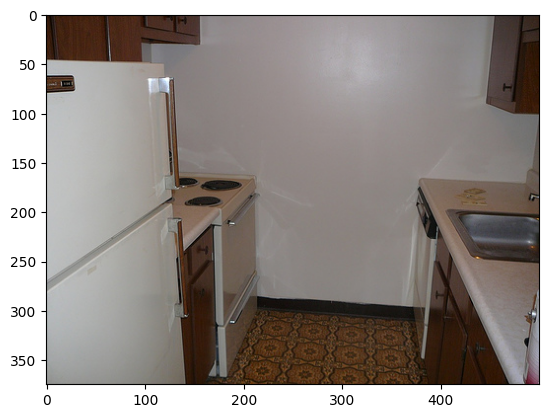

In [94]:
img = cv2.imread('OFA/imgs_test_public/000000001066.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)
plt.imshow(img_rgb)

### Additional data

In [13]:
import pandas as pd
import os
from tqdm import tqdm
import torchvision
import torch
import cv2

In [31]:
test_public = pd.read_csv('/test_public.csv')

,image,width,height,left,top,right,bottom,question
0,https://toloka-cdn.azureedge.net/wsdmcup2023/0...,500,375,130,160,217,367,Where can we cook meals
1,https://toloka-cdn.azureedge.net/wsdmcup2023/0...,480,640,352,479,447,512,what do we use to make and receive calls?
2,https://toloka-cdn.azureedge.net/wsdmcup2023/0...,500,375,318,68,499,241,Where can we watch news?
3,https://toloka-cdn.azureedge.net/wsdmcup2023/0...,640,426,130,135,377,275,What is used to change TV channels?
4,https://toloka-cdn.azureedge.net/wsdmcup2023/0...,640,472,224,0,268,47,What is used to carry more belongings?


In [18]:
def get_crop(img, left, top, right, bottom):
    crop_img = img[top:bottom, left:right, :]
    return crop_img

In [36]:
base_path = 'OFA/imgs_test_public/'
crop_path = 'crop_test_public/'

not_written = []

for i, row in tqdm(test_public.iterrows()):
    img_path = row['image'][-16:]
    # img = torchvision.io.read_image(base_path + img_path)
    # img = cv2.imread(base_path + img_path)
    # print(img.shape, row['left'], row['top'], row['right'], row['bottom'])
    img = cv2.imread(base_path + img_path)
    # print(img.shape)
    cropped_img = get_crop(img, row['left'], row['top'], row['right'], row['bottom'])
    new_path = crop_path + img_path

    # transformed_img = apply_random_transform(cropped_img)
    # transformed_img.save(f'{crop_path}{img_path}')
    # torch.save(transformed_img.permute(1, 2, 0).to("cpu"), crop_path + img_path)
    # torch.save(cropped_img, new_path)
    # print(cropped_img.shape)
    # test_public['image'][i] = new_path
    cv2.imwrite(new_path, cropped_img)
    # break

1705it [00:06, 257.16it/s]


In [37]:
len(os.listdir('crop_test_public'))

1705

In [40]:
second_df = test_public.copy(deep=True)
second_df.head()

,image,width,height,left,top,right,bottom,question
0,/media/hdd/anoskov/ofa_test/crop_test_public/0...,500,375,130,160,217,367,Where can we cook meals
1,/media/hdd/anoskov/ofa_test/crop_test_public/0...,480,640,352,479,447,512,what do we use to make and receive calls?
2,/media/hdd/anoskov/ofa_test/crop_test_public/0...,500,375,318,68,499,241,Where can we watch news?
3,/media/hdd/anoskov/ofa_test/crop_test_public/0...,640,426,130,135,377,275,What is used to change TV channels?
4,/media/hdd/anoskov/ofa_test/crop_test_public/0...,640,472,224,0,268,47,What is used to carry more belongings?


In [42]:
test_public.to_csv('test_public_openclip.csv')

In [ ]:
src_path = 'crop_test_public/'
for i, row in test_public.iterrows():
    test_public['image'][i] = src_path + test_public['image'][i][-16:]

In [30]:
new_df.to_csv('train_openclip.csv')